<a href="https://colab.research.google.com/github/Caduescanti/instagram-modelagem-estatistica_regressao/blob/main/Regressao_instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho de Regressão**

## Aluno: Carlos Eduardo Moura Santos Matrícula: 514072
## Aluno: Jose Enilson Mesquita da Silva Matrícula:  497562



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
instagram_df=pd.read_csv("instagram.csv")

In [ ]:
#printar o nome de todas as colunas
instagram_df.columns

Index(['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo',
       'idade', 'genero', 'trabalha', 'trabalhaInstagram', 'videosLongos',
       'moraSo', 'Semestre', 'streamingDiario', 'acesso', 'translado',
       'transporte'],
      dtype='object')

In [ ]:
instagram_df.head((14))

,Segunda,Terca,Quarta,Quinta,Sexta,Sabado,Domingo,idade,genero,trabalha,trabalhaInstagram,videosLongos,moraSo,Semestre,streamingDiario,acesso,translado,transporte
0,56 minutos,1 hora e 16 minutos,47 minutos,1 hora e 22 minutos,22 minutos,55 minutos,38 minutos,24,Masculino,Sim,Não,Sim,Não,5+,Sim,4g e outros diferentes meios de wi-fi.,40 minutos,Majoritariamente privado
1,1 h 22 min,1 h 27 min,53 mim,1 h 13 min,38 min,1 h 50 min,32 min,23,Hétero,Sim,Não,Sim,Sim,5+,Não,4g e outros diferentes meios de wi-fi.,40 min,Majoritariamente privado
2,56min,1h 35min,1h 39min,43min,58min,2h 58min,1h 14min,22,Masculino,Sim,Não,Sim,Não,5+,Não,4g e outros diferentes meios de wi-fi.,1h 40min,Majoritariamente público
3,0,0,0.85,0,0,0,0,21,M,Sim,Não,Sim,Não,5+,Não,Wi-fi,2 horas,Majoritariamente público
4,0.5,1,0.35,1,0.75,2,1.5,22,Masculino,Não,Não,Sim,Não,5+,Sim,4g e outros diferentes meios de wi-fi.,1 hora,Majoritariamente público
5,3 horas e 37 minutos,2 horas 53 mnutos,1 horas 30 minutos,3 horas 31 minutos,3 horas 11 minutos,4 horas 28 minutos,4 horas 58 minutos,23,masculino,Não,Não,Sim,Não,5+,Sim,Wi-fi,onibus,Majoritariamente público
6,25m,31m,52m,1h23m,1h14m,57m,1h20m,24,masculino,Sim,Não,Não,Não,5+,Não,4g e outros diferentes meios de wi-fi.,1h30m,Majoritariamente público
7,160 minutos,194 minutos,228 minutos,136 minutos,193 minutos,298 minutos,271 minutos,25,feminino,Não,Não,Sim,Não,5+,Não,Wi-fi,180 minutos,Majoritariamente público
8,3 hr,1 hr,3 hr,1:30 hr,20min,29min,1hr,22,masculino,Sim,Não,Não,Não,5+,Sim,Wi-fi,2hrs,Majoritariamente privado
9,1h48m,2h14m,2h46,2h00m,2h48m,2h04m,1h55m,21,Masculino,Sim,Não,Sim,Não,5+,Sim,4g e outros diferentes meios de wi-fi.,2h,Majoritariamente público


In [ ]:
#consertando informaçoes no dataset

In [ ]:
# 1. Padronizar a coluna 'genero'
instagram_df['genero'] = instagram_df['genero'].replace({
    'M': 'masculino',
    'Hétero': 'masculino',
    'Maculino': 'masculino',
    'Masculino': 'masculino'})


In [ ]:
instagram_df['idade'] = instagram_df['idade'].astype(str).str.extract('(\d+)').astype(float).astype('Int64')


In [ ]:
# Função para converter o tempo em minutos
def convert_to_minutes(time_str):
    if isinstance(time_str, str):  # Verifica se é uma string
        time_str = time_str.lower().strip()  # Converte para minúsculo e remove espaços extras

        # Caso de minutos apenas (por exemplo, "56 minutos" ou "56 min")
        if 'min' in time_str:
            mins = ''.join(filter(str.isdigit, time_str))
            return int(mins) if mins else 0


        # Caso de horas e minutos (por exemplo, "1h 30min" ou "2 horas e 5 minutos")
        elif 'h' in time_str:
            hours = ''.join(filter(str.isdigit, time_str.split('h')[0]))  # Extrai a parte das horas
            minutes = ''.join(filter(str.isdigit, time_str.split('h')[-1]))  # Extrai a parte dos minutos
            hours = int(hours) if hours else 0
            minutes = int(minutes) if minutes else 0
            return hours * 60 + minutes

        # Caso de horas completas (por exemplo, "3 horas")
        elif 'hora' in time_str:
            hours = ''.join(filter(str.isdigit, time_str.split('hora')[0]))  # Extrai a parte das horas
            return int(hours) * 60 if hours else 0

    return 0  # Retorna 0 se não conseguir identificar o formato

# Aplicando a função a todas as colunas
for column in ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']:
    instagram_df[column] = instagram_df[column].apply(convert_to_minutes)

# Exibindo o DataFrame atualizado
display(instagram_df.head(20))


,Segunda,Terca,Quarta,Quinta,Sexta,Sabado,Domingo,idade,genero,trabalha,trabalhaInstagram,videosLongos,moraSo,Semestre,streamingDiario,acesso,translado,transporte
0,56,116,47,122,22,55,38,24,masculino,Sim,Não,Sim,Não,5+,Sim,4g e outros diferentes meios de wi-fi.,40 minutos,Majoritariamente privado
1,122,127,0,113,38,150,32,23,masculino,Sim,Não,Sim,Sim,5+,Não,4g e outros diferentes meios de wi-fi.,40 min,Majoritariamente privado
2,56,135,139,43,58,258,114,22,masculino,Sim,Não,Sim,Não,5+,Não,4g e outros diferentes meios de wi-fi.,1h 40min,Majoritariamente público
3,0,0,0,0,0,0,0,21,masculino,Sim,Não,Sim,Não,5+,Não,Wi-fi,2 horas,Majoritariamente público
4,0,0,0,0,0,0,0,22,masculino,Não,Não,Sim,Não,5+,Sim,4g e outros diferentes meios de wi-fi.,1 hora,Majoritariamente público
5,337,173,130,331,311,428,458,23,masculino,Não,Não,Sim,Não,5+,Sim,Wi-fi,onibus,Majoritariamente público
6,0,0,0,83,74,0,80,24,masculino,Sim,Não,Não,Não,5+,Não,4g e outros diferentes meios de wi-fi.,1h30m,Majoritariamente público
7,160,194,228,136,193,298,271,25,feminino,Não,Não,Sim,Não,5+,Não,Wi-fi,180 minutos,Majoritariamente público
8,180,60,180,7800,20,29,60,22,masculino,Sim,Não,Não,Não,5+,Sim,Wi-fi,2hrs,Majoritariamente privado
9,108,134,166,120,168,124,115,21,masculino,Sim,Não,Sim,Não,5+,Sim,4g e outros diferentes meios de wi-fi.,2h,Majoritariamente público


In [ ]:


# Substituindo os valores da linha 4 (índice 3) com os novos valores para os dias da semana
instagram_df.loc[4, ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']] = [50, 60, 35, 60, 75, 120, 90]

# Exibindo o resultado
print(instagram_df)


    Segunda  Terca  Quarta  Quinta  Sexta  Sabado  Domingo  idade     genero  \
0        56    116      47     122     22      55       38     24  masculino   
1       122    127       0     113     38     150       32     23  masculino   
2        56    135     139      43     58     258      114     22  masculino   
3         0      0       0       0      0       0        0     21  masculino   
4        50     60      35      60     75     120       90     22  masculino   
5       337    173     130     331    311     428      458     23  masculino   
6         0      0       0      83     74       0       80     24  masculino   
7       160    194     228     136    193     298      271     25   feminino   
8       180     60     180    7800     20      29       60     22  masculino   
9       108    134     166     120    168     124      115     21  masculino   
10       12     25       7      13     21      36       39     21  masculino   
11       18     10       9       0      

In [ ]:
instagram_df.loc[13, ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']] = [39, 43, 52, 38, 35, 21, 61]


In [ ]:
print(instagram_df)

    Segunda  Terca  Quarta  Quinta  Sexta  Sabado  Domingo  idade     genero  \
0        56    116      47     122     22      55       38     24  masculino   
1       122    127       0     113     38     150       32     23  masculino   
2        56    135     139      43     58     258      114     22  masculino   
3         0      0       0       0      0       0        0     21  masculino   
4        50     60      35      60     75     120       90     22  masculino   
5       337    173     130     331    311     428      458     23  masculino   
6         0      0       0      83     74       0       80     24  masculino   
7       160    194     228     136    193     298      271     25   feminino   
8       180     60     180    7800     20      29       60     22  masculino   
9       108    134     166     120    168     124      115     21  masculino   
10       12     25       7      13     21      36       39     21  masculino   
11       18     10       9       0      

In [ ]:

# Função para converter o tempo em minutos
def convert_to_minutes(time_str):
    if isinstance(time_str, str):  # Verifica se é uma string
        time_str = time_str.lower().strip()  # Converte para minúsculo e remove espaços extras

        # Caso "ônibus" ou outro valor não numérico, retorna NaN
        if not any(char.isdigit() for char in time_str):
            return None  # ou 0, se quiser tratar como zero minutos

        # Caso de minutos apenas (por exemplo, "40 minutos" ou "40 min")
        if 'min' in time_str:
            mins = ''.join(filter(str.isdigit, time_str))
            return int(mins) if mins else 0

        # Caso de horas e minutos (por exemplo, "1h 30min", "1h30m", "2h 5min")
        elif 'h' in time_str:
            parts = time_str.split('h')
            hours = ''.join(filter(str.isdigit, parts[0]))  # Pega a parte das horas
            minutes = ''.join(filter(str.isdigit, parts[1])) if len(parts) > 1 else "0"  # Pega a parte dos minutos, se houver

            hours = int(hours) if hours else 0
            minutes = int(minutes) if minutes else 0
            return hours * 60 + minutes

        # Caso de horas completas (exemplo: "2 horas", "7h", "2hrs")
        elif 'hora' in time_str or 'hrs' in time_str:
            hours = ''.join(filter(str.isdigit, time_str))
            return int(hours) * 60 if hours else 0

        # Caso de intervalo "30~40 min", pegamos a média
        elif '~' in time_str:
            nums = [int(num) for num in time_str.split('~') if num.isdigit()]
            return sum(nums) // len(nums) if nums else 0

    # Caso o valor já seja um número, retorna como está
    elif isinstance(time_str, (int, float)):
        return int(time_str)

    return 0  # Retorna 0 caso não consiga identificar um valor válido

# Aplicando a função à coluna "translado"
instagram_df['translado'] = instagram_df['translado'].apply(convert_to_minutes)

# Exibindo o DataFrame atualizado
print(instagram_df.head(20))



    Segunda  Terca  Quarta  Quinta  Sexta  Sabado  Domingo  idade     genero  \
0        56    116      47     122     22      55       38     24  masculino   
1       122    127       0     113     38     150       32     23  masculino   
2        56    135     139      43     58     258      114     22  masculino   
3         0      0       0       0      0       0        0     21  masculino   
4        50     60      35      60     75     120       90     22  masculino   
5       337    173     130     331    311     428      458     23  masculino   
6         0      0       0      83     74       0       80     24  masculino   
7       160    194     228     136    193     298      271     25   feminino   
8       180     60     180    7800     20      29       60     22  masculino   
9       108    134     166     120    168     124      115     21  masculino   
10       12     25       7      13     21      36       39     21  masculino   
11       18     10       9       0      

In [ ]:
print(instagram_df.head(20))

    Segunda  Terca  Quarta  Quinta  Sexta  Sabado  Domingo  idade     genero  \
0        56    116      47     122     22      55       38     24  masculino   
1       122    127       0     113     38     150       32     23  masculino   
2        56    135     139      43     58     258      114     22  masculino   
3         0      0       0       0      0       0        0     21  masculino   
4        50     60      35      60     75     120       90     22  masculino   
5       337    173     130     331    311     428      458     23  masculino   
6         0      0       0      83     74       0       80     24  masculino   
7       160    194     228     136    193     298      271     25   feminino   
8       180     60     180    7800     20      29       60     22  masculino   
9       108    134     166     120    168     124      115     21  masculino   
10       12     25       7      13     21      36       39     21  masculino   
11       18     10       9       0      

In [ ]:
# Salvar o dataset corrigido
instagram_df.to_csv("instagram_corrigido.csv", index=False)

In [ ]:
# Resumo das colunas para verificar mudanças
print("\nResumo das colunas corrigidas:\n")
display(instagram_df.info())


Resumo das colunas corrigidas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Segunda            15 non-null     int64  
 1   Terca              15 non-null     int64  
 2   Quarta             15 non-null     int64  
 3   Quinta             15 non-null     int64  
 4   Sexta              15 non-null     int64  
 5   Sabado             15 non-null     int64  
 6   Domingo            15 non-null     int64  
 7   idade              15 non-null     Int64  
 8   genero             15 non-null     object 
 9   trabalha           15 non-null     object 
 10  trabalhaInstagram  15 non-null     object 
 11  videosLongos       15 non-null     object 
 12  moraSo             15 non-null     object 
 13  Semestre           15 non-null     object 
 14  streamingDiario    15 non-null     object 
 15  acesso             15 non-null     object 


None

As linhas 3,4 e 13 ,tiveram problemas de conversao e onde estava onibus em traslatado ficou o valor 0 ou nan , foi corrigido

# Iniciando A Analise exploratoria

In [ ]:
# Verificar as dimensões do dataset
print(f"Quantidade de linhas: {instagram_df.shape[0]}")
print(f"Quantidade de colunas: {instagram_df.shape[1]}")

Quantidade de linhas: 15
Quantidade de colunas: 18


In [ ]:
# Estatísticas gerais
print("Resumo estatístico das variáveis numéricas:")
display(instagram_df.describe())


Resumo estatístico das variáveis numéricas:


,Segunda,Terca,Quarta,Quinta,Sexta,Sabado,Domingo,idade,translado
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.0,14.000000
mean,81.933333,76.800000,78.400000,595.133333,71.200000,103.866667,92.40000,22.533333,327.142857
std,93.714206,72.573313,82.462805,1995.070205,89.585713,129.627966,122.64455,1.187234,787.551498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,21.0,0.000000
25%,6.000000,5.000000,0.000000,6.500000,14.000000,2.500000,18.50000,22.0,45.000000
50%,56.000000,60.000000,47.000000,83.000000,38.000000,55.000000,60.00000,22.0,120.000000
75%,124.000000,134.500000,144.500000,125.500000,93.500000,137.000000,103.50000,23.0,170.000000
max,337.000000,194.000000,228.000000,7800.000000,311.000000,428.000000,458.00000,25.0,3040.000000


In [ ]:
# Contagem de valores únicos para variáveis categóricas
print("\nValores únicos por variável categórica:")
for col in ['genero', 'trabalha', 'trabalhaInstagram', 'videosLongos', 'moraSo', 'Semestre', 'streamingDiario', 'acesso', 'transporte']:
    print(f"{col}: {instagram_df[col].nunique()} valores únicos")


Valores únicos por variável categórica:
genero: 2 valores únicos
trabalha: 2 valores únicos
trabalhaInstagram: 1 valores únicos
videosLongos: 2 valores únicos
moraSo: 2 valores únicos
Semestre: 1 valores únicos
streamingDiario: 2 valores únicos
acesso: 2 valores únicos
transporte: 2 valores únicos


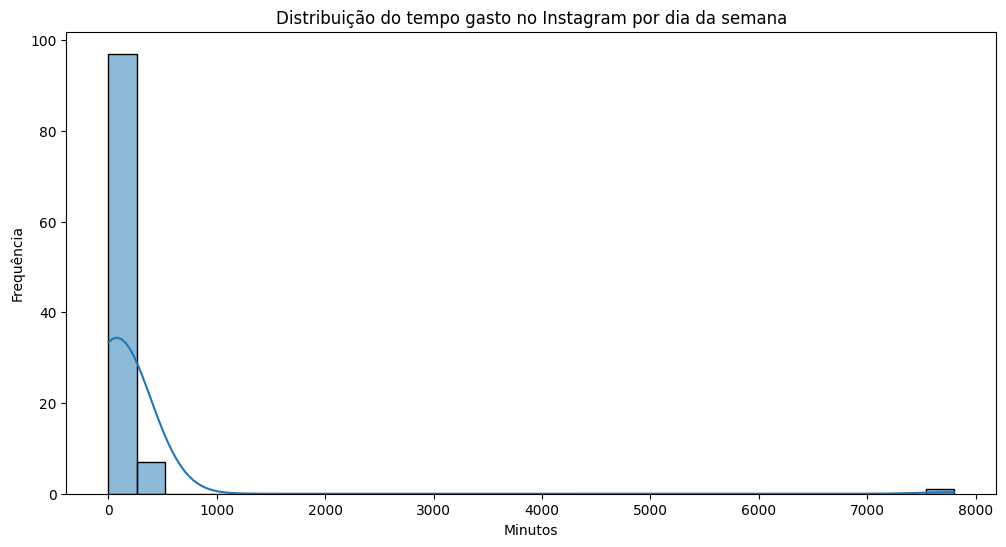

In [ ]:
# Distribuição das variáveis numéricas
plt.figure(figsize=(12, 6))
sns.histplot(instagram_df[['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']].stack(), bins=30, kde=True)
plt.title("Distribuição do tempo gasto no Instagram por dia da semana")
plt.xlabel("Minutos")
plt.ylabel("Frequência")
plt.show()


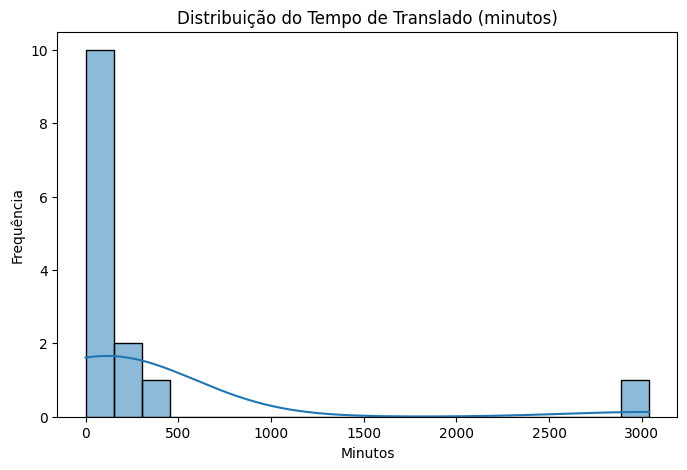

In [ ]:
# Distribuição de tempo de translado
plt.figure(figsize=(8, 5))
sns.histplot(instagram_df['translado'].dropna(), bins=20, kde=True)
plt.title("Distribuição do Tempo de Translado (minutos)")
plt.xlabel("Minutos")
plt.ylabel("Frequência")
plt.show()



<ipython-input-44-846b003a573e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genero', data=instagram_df, palette='bright')


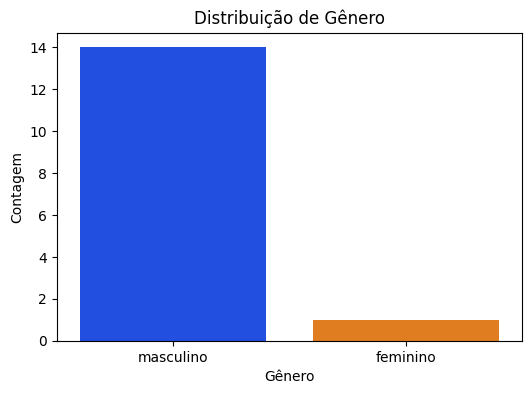

In [ ]:

# Proporção de gênero
plt.figure(figsize=(6, 4))
sns.countplot(x='genero', data=instagram_df, palette='bright')
plt.title("Distribuição de Gênero")
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.show()




#o numero de integrantes masculino na pesquisa sao maiores

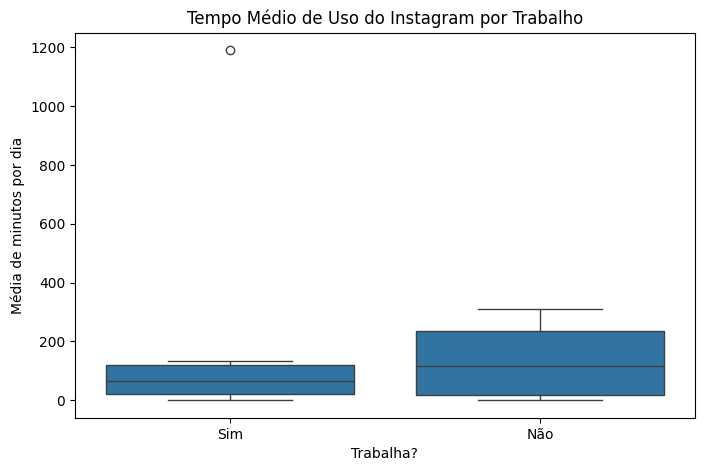

In [ ]:
# Comparação de uso do Instagram entre quem trabalha e quem não trabalha
plt.figure(figsize=(8, 5))
sns.boxplot(x='trabalha', y=instagram_df[['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']].mean(axis=1), data=instagram_df)
plt.title("Tempo Médio de Uso do Instagram por Trabalho")
plt.xlabel("Trabalha?")
plt.ylabel("Média de minutos por dia")
plt.show()

* foi indetificado 1 outliner

<ipython-input-46-7bc4cde4e447>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='transporte', data=instagram_df, palette='deep', order=instagram_df['transporte'].value_counts().index)


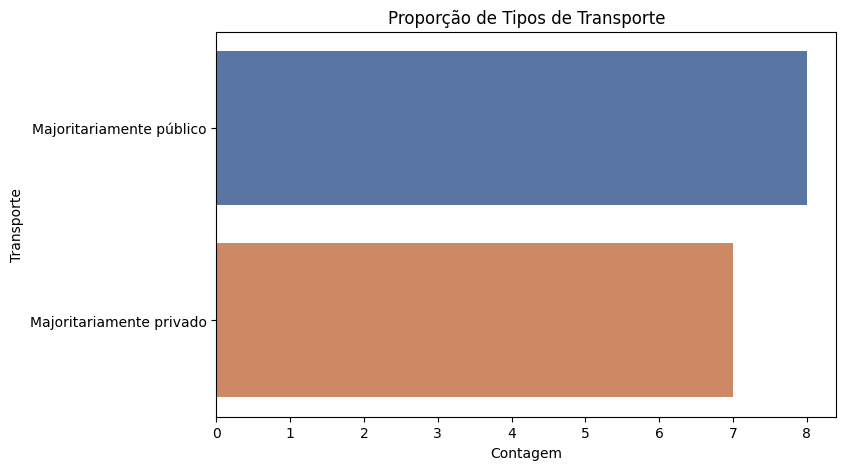

In [ ]:
# Proporção de tipos de transporte
plt.figure(figsize=(8, 5))
sns.countplot(y='transporte', data=instagram_df, palette='deep', order=instagram_df['transporte'].value_counts().index)
plt.title("Proporção de Tipos de Transporte")
plt.xlabel("Contagem")
plt.ylabel("Transporte")
plt.show()

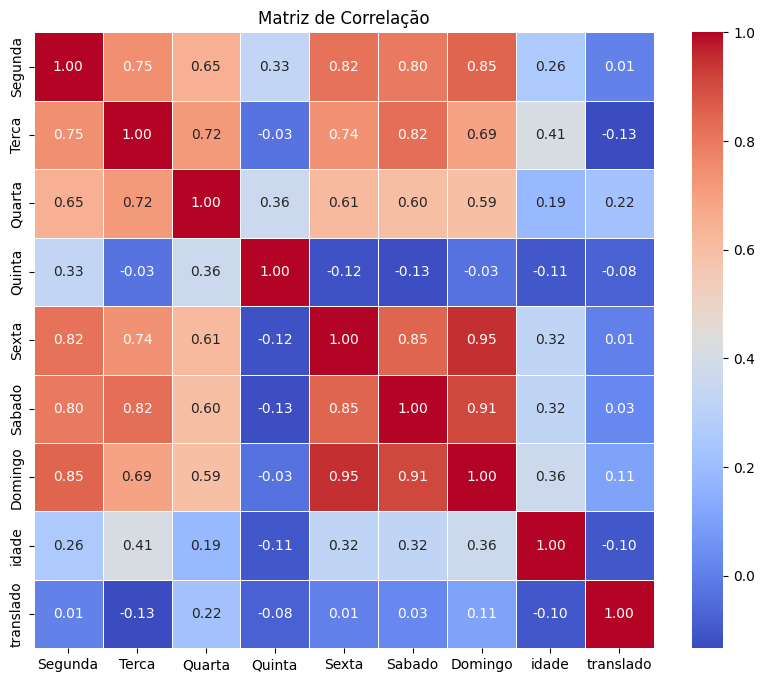

In [ ]:

# Selecionar apenas colunas numéricas
numeric_df = instagram_df.select_dtypes(include=['number'])

# Criar matriz de correlação
plt.figure(figsize=(10, 8))  # Ajuste o tamanho para melhor visualização
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()


In [ ]:
# Calcular matriz de correlação
correlation_matrix = numeric_df.corr()

# Exibir a matriz no terminal
print("Matriz de Correlação:\n", correlation_matrix)

Matriz de Correlação:
             Segunda     Terca    Quarta    Quinta     Sexta    Sabado  \
Segunda    1.000000  0.745964  0.649835  0.328662  0.816294  0.797239   
Terca      0.745964  1.000000  0.715422 -0.030778  0.738602  0.823539   
Quarta     0.649835  0.715422  1.000000  0.361952  0.613932  0.600489   
Quinta     0.328662 -0.030778  0.361952  1.000000 -0.119188 -0.125230   
Sexta      0.816294  0.738602  0.613932 -0.119188  1.000000  0.848449   
Sabado     0.797239  0.823539  0.600489 -0.125230  0.848449  1.000000   
Domingo    0.847883  0.686447  0.594500 -0.034828  0.948713  0.907027   
idade      0.257782  0.410856  0.188088 -0.105639  0.318597  0.318886   
translado  0.010971 -0.133662  0.221736 -0.077766  0.006320  0.029267   

            Domingo     idade  translado  
Segunda    0.847883  0.257782   0.010971  
Terca      0.686447  0.410856  -0.133662  
Quarta     0.594500  0.188088   0.221736  
Quinta    -0.034828 -0.105639  -0.077766  
Sexta      0.948713  0.318597  

#Correlação entre os dias da semana:

* Segunda, Sexta e Domingo têm correlação alta e positiva (acima de 0.8).
Isso sugere que, se há atividade em um desses dias, provavelmente também há nos outros.
* Quinta-feira tem baixa correlação com os outros dias:

* Com Sexta (-0.119) e Sábado (-0.125), indicando que a atividade na quinta não se relaciona muito com os demais dias.
Idade e os dias da semana:

* A idade tem correlações moderadas (entre 0.18 e 0.41) com os dias, sugerindo que pessoas mais velhas ou mais jovens podem ter padrões de atividade diferentes ao longo da semana.
Translado e os dias da semana:

* A variável translado tem correlação muito fraca com os dias da semana (próximo de 0), indicando que o translado não está relacionado diretamente ao comportamento semanal.
Domingo e Sexta são fortemente correlacionados (0.94):

* Quem está ativo na Sexta tende a estar ativo no Domingo.
Conclusão
Essa matriz sugere padrões semanais de atividade. Algumas hipóteses que podem ser exploradas:

* Existe um ciclo onde pessoas estão mais ativas no início e fim de semana.
Quinta-feira pode ser um dia "fora do padrão" de comportamento.

- A matriz de correlação mostra que Segunda, Sexta e Domingo possuem alta correlação (acima de 0.8), indicando um padrão de uso nesses dias.

#Perfil Comportamental

* Trabalho: A maioria dos indivíduos trabalha.


* Uso do Instagram: A maioria não trabalha com Instagram.

* Streaming Diário: Dados ausentes, dificultando análise.

* Transporte: Maioria usa transporte público.

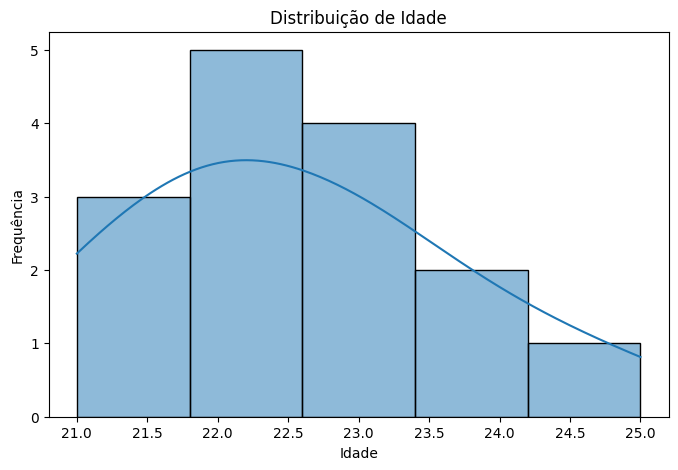

In [ ]:
# Distribuição de idade
plt.figure(figsize=(8, 5))
sns.histplot(instagram_df['idade'], bins=5, kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()



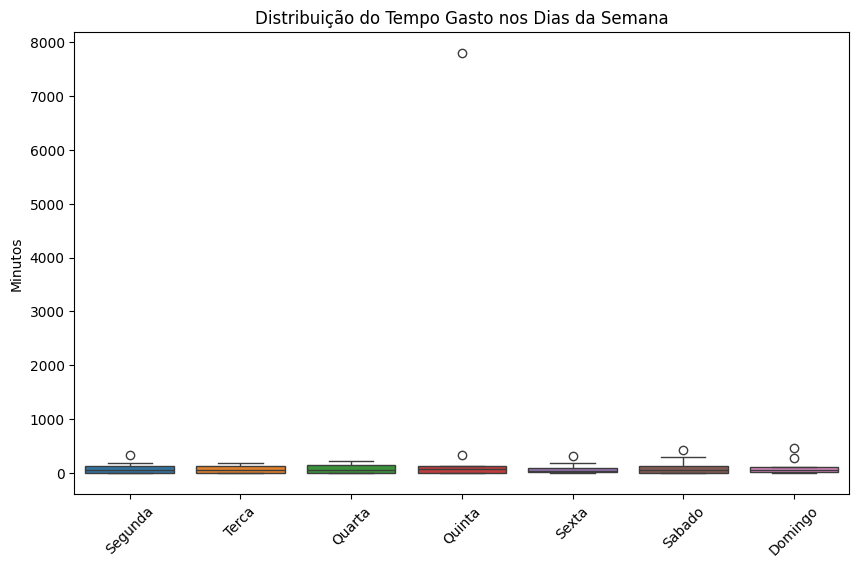

In [ ]:
# Boxplot dos tempos gastos nos dias da semana
plt.figure(figsize=(10, 6))
sns.boxplot(data=instagram_df[['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']])
plt.title('Distribuição do Tempo Gasto nos Dias da Semana')
plt.ylabel('Minutos')
plt.xticks(rotation=45)
plt.show()

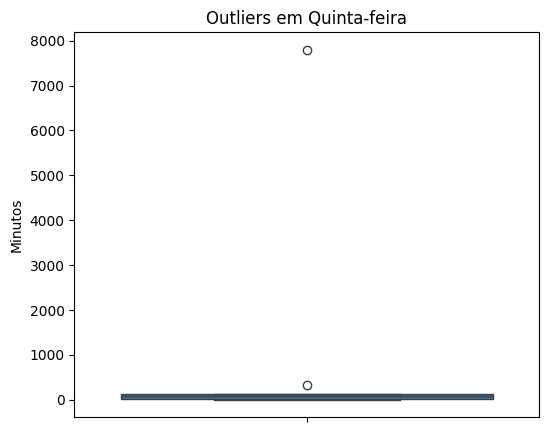

In [ ]:

# Análise dos outliers em Quinta-feira
plt.figure(figsize=(6, 5))
sns.boxplot(y=instagram_df['Quinta'])
plt.title('Outliers em Quinta-feira')
plt.ylabel('Minutos')
plt.show()

In [ ]:
# Carregar o dataset
df = pd.read_csv("instagram_corrigido.csv")

# Remover valores NaN para evitar erros
df = df.dropna()

# Definir a variável resposta e preditoras
variavel_resposta = "Segunda"
variaveis_preditoras = ["idade", "translado"]

# Criar o modelo de regressão binomial negativa
formula = f"{variavel_resposta} ~ " + " + ".join(variaveis_preditoras)
modelo = smf.glm(formula=formula, data=df, family=sm.families.NegativeBinomial()).fit()

# Exibir o resumo do modelo
print(modelo.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                Segunda   No. Observations:                   14
Model:                            GLM   Df Residuals:                       11
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -71.842
Date:                Fri, 28 Feb 2025   Deviance:                       39.446
Time:                        20:34:58   Pearson chi2:                     13.7
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05947
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5250      5.184     -0.101      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


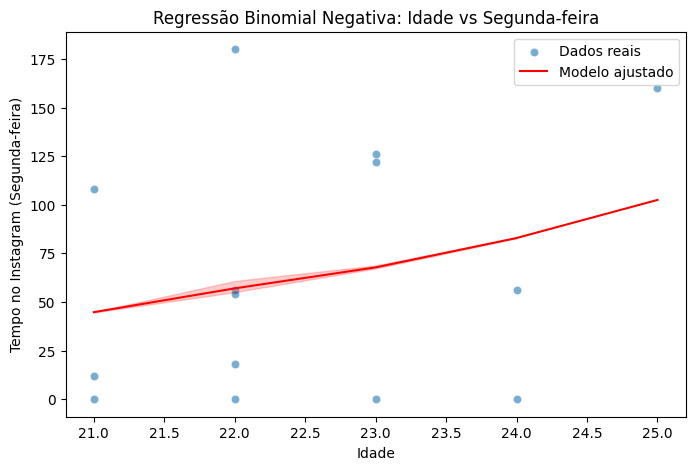

In [ ]:
# Definir a variável resposta e preditoras
variavel_resposta = "Segunda"
variaveis_preditoras = ["idade", "translado"]

# Criar o modelo de regressão binomial negativa
formula = f"{variavel_resposta} ~ " + " + ".join(variaveis_preditoras)
modelo = smf.glm(formula=formula, data=df, family=sm.families.NegativeBinomial()).fit()

# Fazer previsões para o eixo X escolhido (exemplo: Idade)
df["predito"] = modelo.predict(df)

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["idade"], y=df[variavel_resposta], label="Dados reais", alpha=0.6)
sns.lineplot(x=df["idade"], y=df["predito"], color="red", label="Modelo ajustado")

# Melhorando a visualização
plt.xlabel("Idade")
plt.ylabel("Tempo no Instagram (Segunda-feira)")
plt.title("Regressão Binomial Negativa: Idade vs Segunda-feira")
plt.legend()
plt.show()

# * A idade influencia o tempo de uso do Instagram? Parcialmente- A idade tem correlação moderada com os dias da semana (entre 0.18 e 0.41), sugerindo que pode haver padrões diferentes de uso entre faixas etárias. No entanto, no modelo de regressão binomial negativa, a variável "idade" não foi estatisticamente significativa (p-valor = 0.37). Isso sugere que, pelo menos nesse modelo, idade não é um forte preditor do uso do Instagram.
#O translado influencia o tempo de uso do Instagram? Não  - A correlação entre translado e os dias da semana foi muito baixa (próxima de 0), e no modelo estatístico, o coeficiente foi praticamente nulo (p-valor = 0.878). Isso indica que translado não tem impacto relevante no uso do Instagram.


#Quinta-feira tem um comportamento diferente em relação ao resto da semana? Confirmado - A correlação de Quinta-feira com Sexta e Sábado é negativa (-0.119 e -0.125, respectivamente), mostrando que a atividade na Quinta não segue o padrão dos outros dias.

# A linha vermelha mostra o modelo ajustado, com uma leve tendência de crescimento conforme a idade aumenta.
# Há grande dispersão nos dados, indicando que o modelo pode não estar capturando bem algumas variabilidades.

# Testando um Modelo de Regressão de Poisson

In [ ]:
# Criar o modelo de regressão de Poisson
modelo_poisson = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

# Exibir o resumo do modelo
print(modelo_poisson.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                Segunda   No. Observations:                   14
Model:                            GLM   Df Residuals:                       11
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -490.51
Date:                Fri, 28 Feb 2025   Deviance:                       920.59
Time:                        20:35:25   Pearson chi2:                     809.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9861
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7253      0.630     -1.151      0.2

In [ ]:
print(f"Variância: {df[variavel_resposta].var()}, Média: {df[variavel_resposta].mean()}")


Variância: 4095.912087912087, Média: 63.714285714285715


Testei no modelo de poison e ele nao é o mais apropiado por conta da viancia ser maior que a media

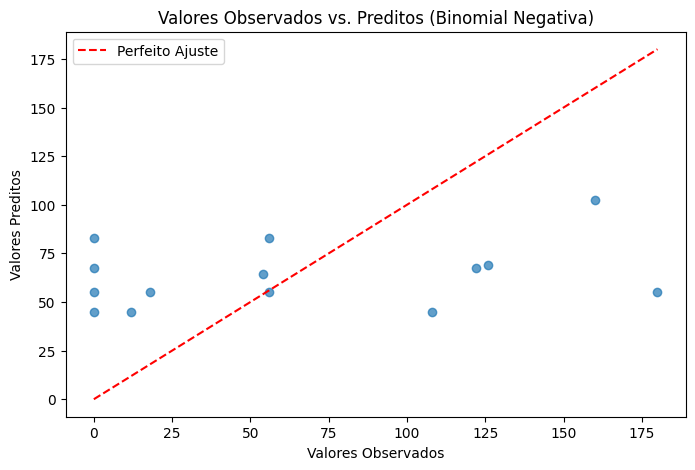

In [ ]:
import matplotlib.pyplot as plt

# Predições do modelo Binomial Negativo
df["predito"] = modelo.predict(df)

plt.figure(figsize=(8, 5))
plt.scatter(df["Segunda"], df["predito"], alpha=0.7)
plt.plot([df["Segunda"].min(), df["Segunda"].max()],
         [df["Segunda"].min(), df["Segunda"].max()],
         color="red", linestyle="--", label="Perfeito Ajuste")

plt.xlabel("Valores Observados")
plt.ylabel("Valores Preditos")
plt.title("Valores Observados vs. Preditos (Binomial Negativa)")
plt.legend()
plt.show()



# A linha vermelha indica um ajuste perfeito (onde os valores preditos seriam exatamente iguais aos observados).

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


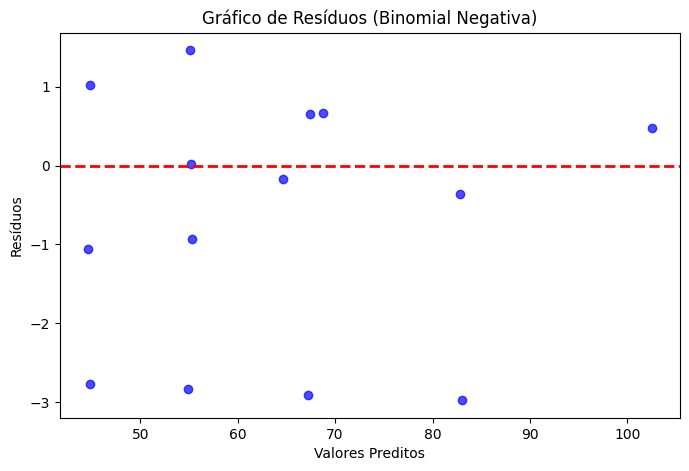

In [ ]:

# Carregar os dados corrigidos
df = pd.read_csv("instagram_corrigido.csv")

# Remover valores NaN
df = df.dropna()

# Definir a variável resposta e preditoras
variavel_resposta = "Segunda"
variaveis_preditoras = ["idade", "translado"]

# Criar o modelo de regressão binomial negativa
formula = f"{variavel_resposta} ~ " + " + ".join(variaveis_preditoras)
modelo = smf.glm(formula=formula, data=df, family=sm.families.NegativeBinomial()).fit()

# Obter resíduos do modelo
residuos = modelo.resid_deviance

# Criar gráfico de resíduos
plt.figure(figsize=(8, 5))
plt.scatter(modelo.fittedvalues, residuos, alpha=0.7, color="blue")
plt.axhline(y=0, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos (Binomial Negativa)")
plt.show()